In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Hotel%20Prices%20-%20Beginner%20Dataset/hotels.csv")
df.head()

,Profit,Price in Millions,Square Meter,City
0,119000.0,21.88,3938.0,Berlin
1,250000.0,27.95,3986.0,Munich
2,250000.0,16.09,2574.0,Cologne
3,145000.0,27.58,4155.0,Munich
4,110000.0,23.76,3795.0,Berlin


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Profit             150 non-null    float64
 1   Price in Millions  150 non-null    float64
 2   Square Meter       150 non-null    float64
 3   City               150 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.8+ KB


<AxesSubplot:>

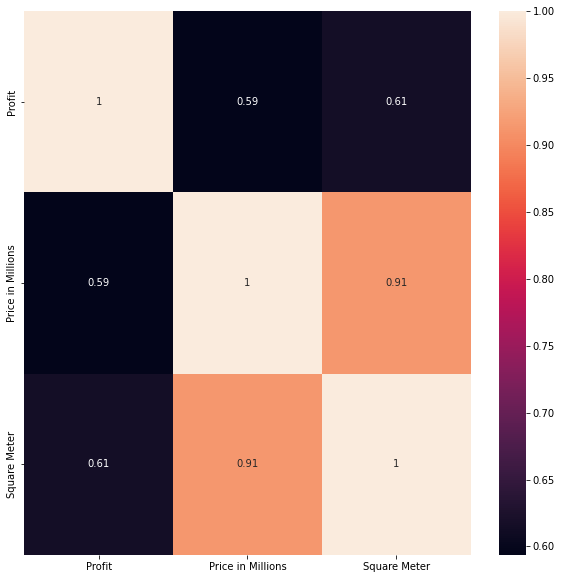

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [5]:
df["City"].describe()

count         150
unique          3
top       Cologne
freq           61
Name: City, dtype: object

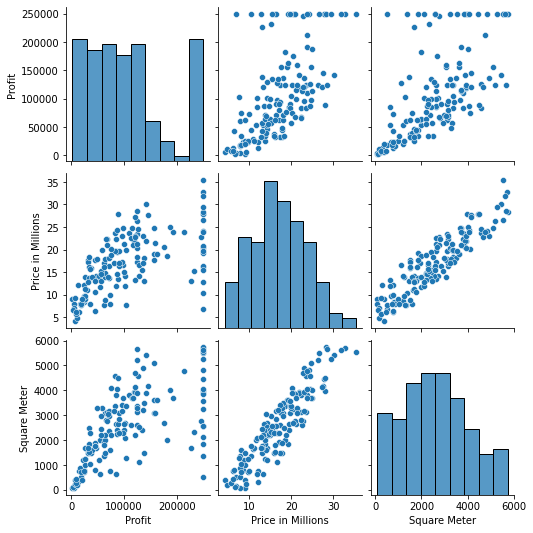

In [6]:
sns.pairplot(df)

<AxesSubplot:xlabel='Square Meter', ylabel='Price in Millions'>

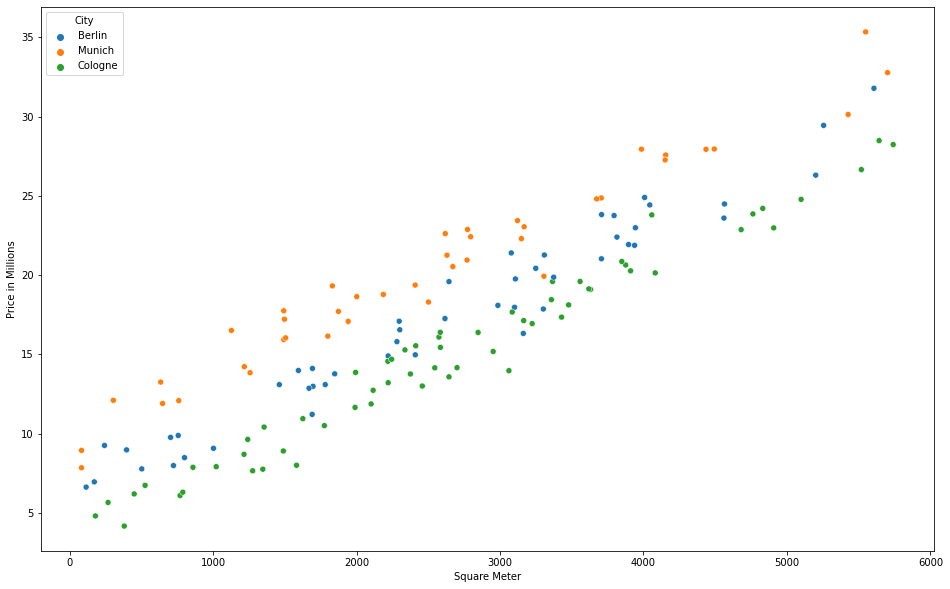

In [7]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df, x='Square Meter', y='Price in Millions', hue='City' )

<Figure size 1008x1008 with 0 Axes>

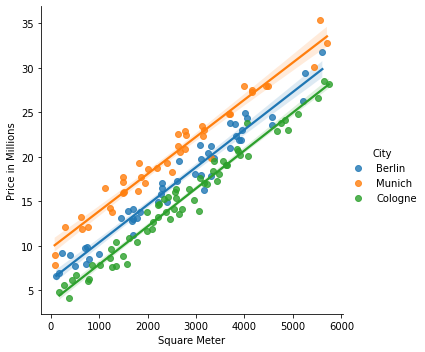

In [8]:
plt.figure(figsize=(14,14))
sns.lmplot(data = df, x='Square Meter', y='Price in Millions', hue='City')

<AxesSubplot:xlabel='City', ylabel='Price in Millions'>

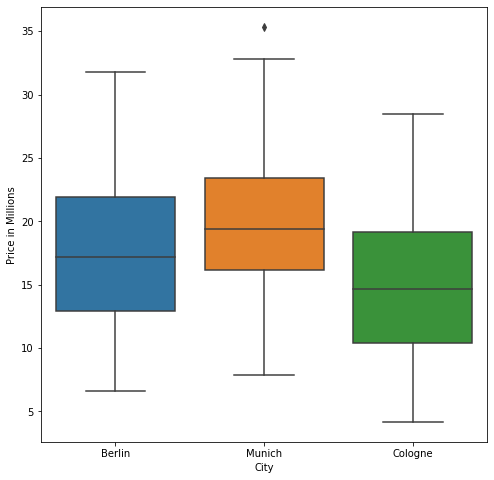

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df, x='City', y='Price in Millions' )

<AxesSubplot:xlabel='Square Meter', ylabel='Profit'>

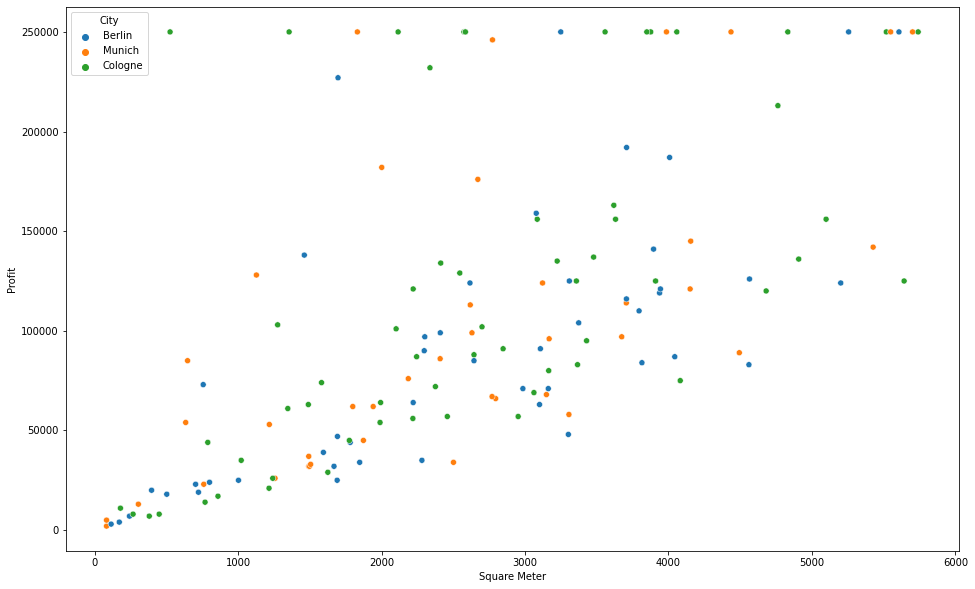

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df, x='Square Meter', y='Profit', hue='City' )

In [11]:
df['Profit per Square Meter'] = df['Profit'] / df['Square Meter']
df['Price per Square Meter'] = (df['Price in Millions'] * 1000000 )/ df['Square Meter']
df.head()

,Profit,Price in Millions,Square Meter,City,Profit per Square Meter,Price per Square Meter
0,119000.0,21.88,3938.0,Berlin,30.218385,5556.119858
1,250000.0,27.95,3986.0,Munich,62.719518,7012.042148
2,250000.0,16.09,2574.0,Cologne,97.125097,6250.971251
3,145000.0,27.58,4155.0,Munich,34.897714,6637.785800
4,110000.0,23.76,3795.0,Berlin,28.985507,6260.869565


<AxesSubplot:>

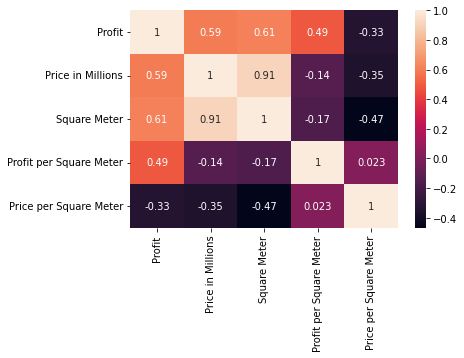

In [12]:
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:xlabel='City', ylabel='Price per Square Meter'>

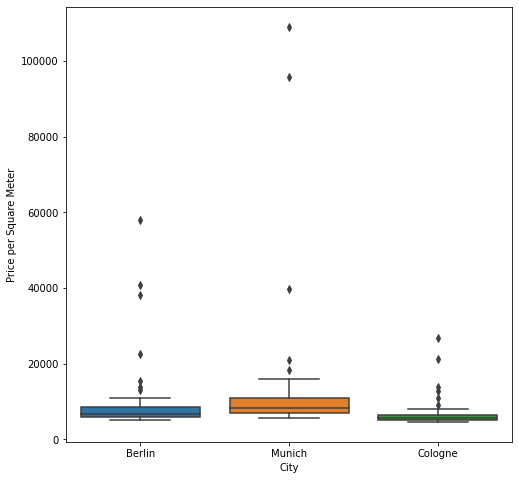

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df, x='City', y='Price per Square Meter' )

<AxesSubplot:xlabel='City', ylabel='Profit per Square Meter'>

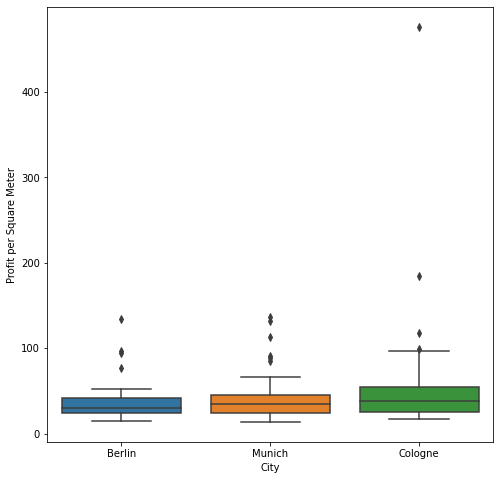

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df, x='City', y='Profit per Square Meter' )

<AxesSubplot:xlabel='City', ylabel='Price per Square Meter'>

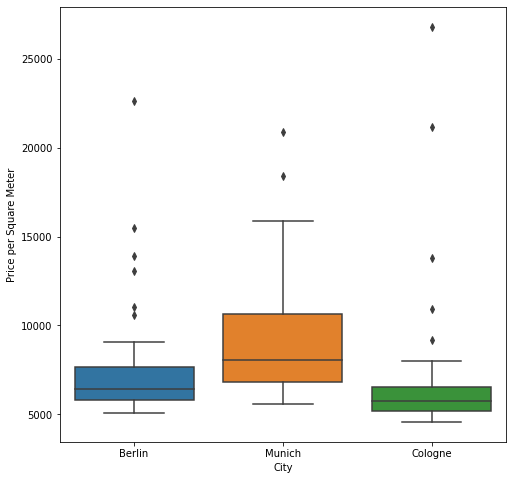

In [15]:
df_clean = df[df['Price per Square Meter']<=30000]
df_clean = df_clean[df_clean['Profit per Square Meter'] <= 200]
plt.figure(figsize=(8,8))
sns.boxplot(data = df_clean, x='City', y='Price per Square Meter' )

<AxesSubplot:xlabel='City', ylabel='Profit per Square Meter'>

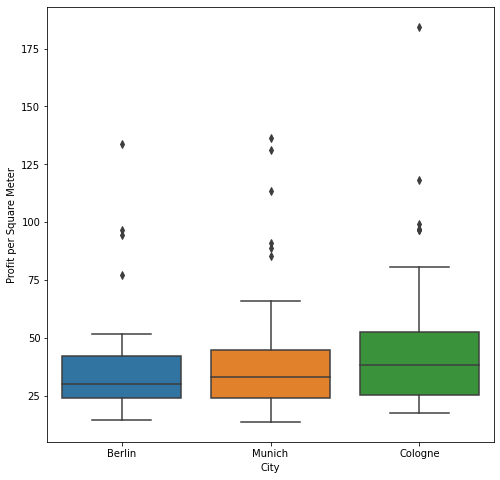

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df_clean, x='City', y='Profit per Square Meter' )

<AxesSubplot:xlabel='Square Meter', ylabel='Profit'>

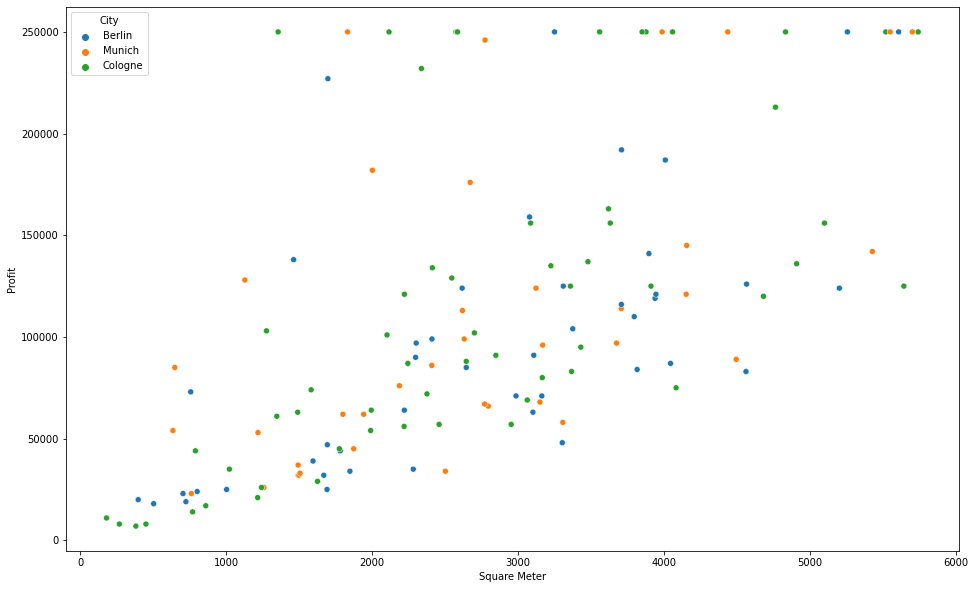

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(data = df_clean, x='Square Meter', y='Profit', hue='City' )

<AxesSubplot:xlabel='Square Meter', ylabel='Profit'>

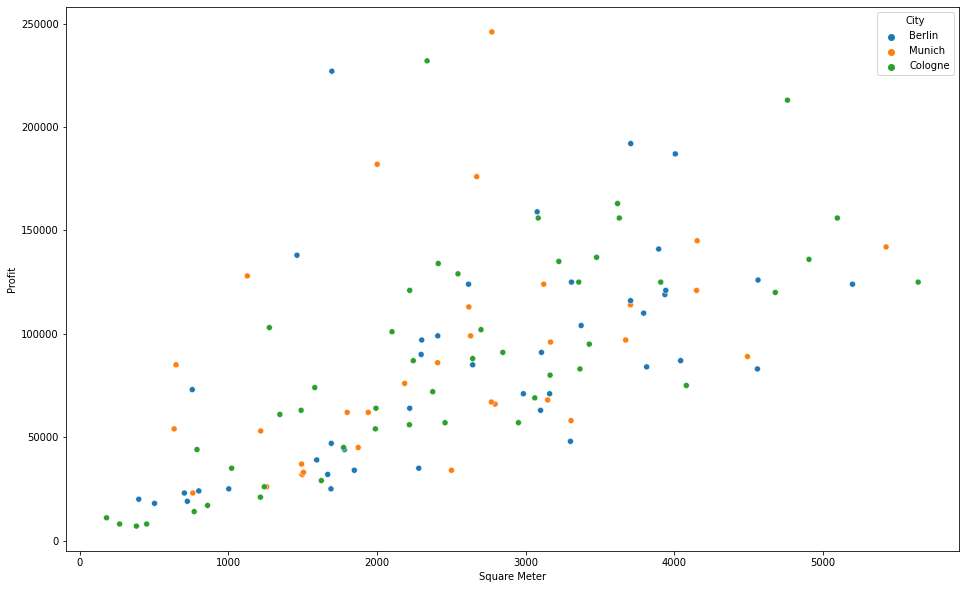

In [18]:
df_clean = df_clean[df_clean['Profit'] != 250000]
plt.figure(figsize=(16,10))
sns.scatterplot(data = df_clean, x='Square Meter', y='Profit', hue='City' )

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Profit                   123 non-null    float64
 1   Price in Millions        123 non-null    float64
 2   Square Meter             123 non-null    float64
 3   City                     123 non-null    object 
 4   Profit per Square Meter  123 non-null    float64
 5   Price per Square Meter   123 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.7+ KB


<Figure size 1152x720 with 0 Axes>

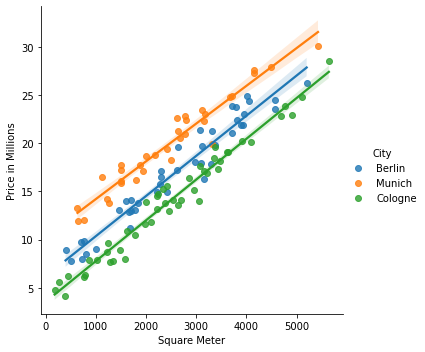

In [20]:
plt.figure(figsize=(16,10))
sns.lmplot(data = df_clean, x='Square Meter', y='Price in Millions', hue='City')

In [21]:
cities = pd.get_dummies(df_clean['City'],drop_first=True)
cities.head()

,Cologne,Munich
0,0,0
3,0,1
4,0,0
5,0,1
6,0,1


In [22]:
training_df = pd.concat([df_clean,cities],axis=1)
training_df.head()

,Profit,Price in Millions,Square Meter,City,Profit per Square Meter,Price per Square Meter,Cologne,Munich
0,119000.0,21.88,3938.0,Berlin,30.218385,5556.119858,0,0
3,145000.0,27.58,4155.0,Munich,34.897714,6637.785800,0,1
4,110000.0,23.76,3795.0,Berlin,28.985507,6260.869565,0,0
5,246000.0,22.88,2773.0,Munich,88.712586,8250.991706,0,1
6,54000.0,13.25,634.0,Munich,85.173502,20899.053628,0,1


In [23]:
training_df.drop(['City','Profit per Square Meter', 'Price per Square Meter'], axis=1, inplace=True)
training_df.head()

,Profit,Price in Millions,Square Meter,Cologne,Munich
0,119000.0,21.88,3938.0,0,0
3,145000.0,27.58,4155.0,0,1
4,110000.0,23.76,3795.0,0,0
5,246000.0,22.88,2773.0,0,1
6,54000.0,13.25,634.0,0,1


In [24]:
y = training_df['Price in Millions']
X = training_df.drop('Price in Millions', axis=1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=60)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [27]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Profit,0.000011
Square Meter,0.003908
Cologne,-2.600838
Munich,3.714223


In [28]:
predictions = model.predict(X_test)
predictions

array([22.72260281, 19.99576897,  6.8526423 , 13.10721479, 12.84857524,
       21.76228026, 32.43128659, 23.23402666,  9.68343398, 20.00051852,
       27.49417792, 12.60410751, 14.973365  , 15.83042867, 23.67983674,
       27.20748331, 13.34605128,  8.06961387, 12.70628817, 19.77666145,
       22.68430193, 24.32319939, 15.86735998, 20.10323341, 15.81088861,
       27.63055607, 17.52834457, 19.01999708, 15.30311536, 17.19729226,
       22.0448103 , 18.37180459,  9.44968286, 14.82474011, 16.43702922,
       23.19367381, 11.81515895])

<AxesSubplot:xlabel='Price in Millions'>

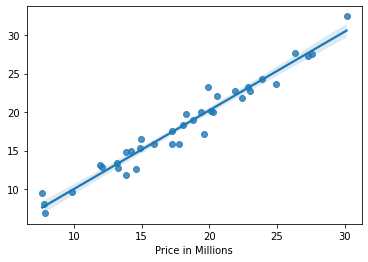

In [29]:
sns.regplot(x=y_test,y=predictions)

In [30]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:      Price in Millions   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     638.8
Date:                Wed, 01 Jun 2022   Prob (F-statistic):           2.24e-60
Time:                        21:21:48   Log-Likelihood:                -123.64
No. Observations:                  86   AIC:                             257.3
Df Residuals:                      81   BIC:                             269.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.9045      0.307     19.245   